In [220]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso

import pysindy as ps
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
from stesml.data_tools import get_scenario_index
from stesml.data_tools import get_train_and_val_index
#from stesml.data_tools import load_data

In [143]:
def load_data(scenario_index, selected_index, t_min=-1, t_max=-1):
    """ Load data from files in scenario_index with indices matching ones in selected_index"""
    df_arr = []
    for f in scenario_index.loc[selected_index].filepath:
        Tw = float(f.split("/")[-1].split("_")[1])
        Ti = float(f.split("/")[-1].split("_")[2].replace(".csv", ""))
        f_df = pd.read_csv(f, skiprows=[i for i in range(1,65)])
        f_df["Ti"] = Ti
        if t_min > 0:
            f_df = f_df[f_df['flow-time'] >= t_min]
        if t_max > 0:
            f_df = f_df[f_df['flow-time'] <= t_max]
        df_arr.append(f_df)
    combined_df = pd.concat(df_arr)
    return combined_df

In [144]:
data_dir = "../data/Sulfur_Models/heating/heating_all"

In [145]:
scenario_index = get_scenario_index(data_dir)

In [146]:
train_index, val_index = get_train_and_val_index(scenario_index, random_state=5)

In [147]:
train_data = load_data(scenario_index, train_index)

In [148]:
train_df = train_data[['Tw','Ti','Tavg']]

In [149]:
train_df.index = train_data['flow-time']

In [150]:
train_df

,Tw,Ti,Tavg
flow-time,,,
2.110680,540,400.0,401.297945
2.210680,540,400.0,401.330161
2.310680,540,400.0,401.361742
2.410680,540,400.0,401.391744
2.510680,540,400.0,401.421288
...,...,...,...
7199.604681,460,400.0,429.384154
7199.704681,460,400.0,429.384296
7199.804681,460,400.0,429.384439


In [151]:
train_data_list = list()
index_list = list()
for idx, grp in train_df.groupby(["Tw", "Ti"]):
    train_data_list.append(grp.values)
    index_list.append(grp.index.values)

In [154]:
np.array(train_data_list[1][:,2][0]).reshape(1)

array([400.5664789])

In [211]:
sparse_regression_optimizer = ps.STLSQ(threshold=0, normalize_columns=False)
model = ps.SINDy(sparse_regression_optimizer)

In [212]:
model.fit(train_data_list, t=index_list, multiple_trajectories=True)
model.print()

(x0)' = 0.000
(x1)' = 0.000
(x2)' = 0.074 1


In [213]:
res_list = list()
for i in range(50):
    res = model.simulate(x0=np.array(train_data_list[i][0]).reshape(3),t=index_list[i])
    res_list.append(res)

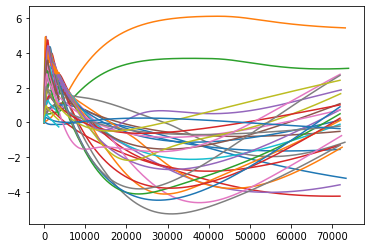

In [214]:
for i in range(50):
    plt.plot(train_data_list[i][:,2] - res_list[i][:,2])

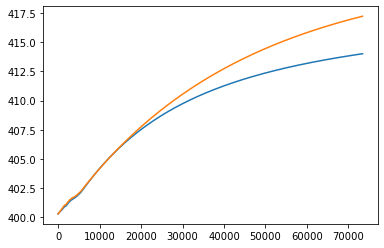

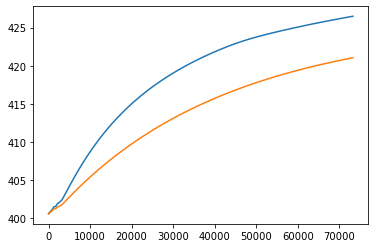

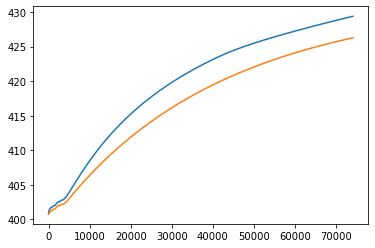

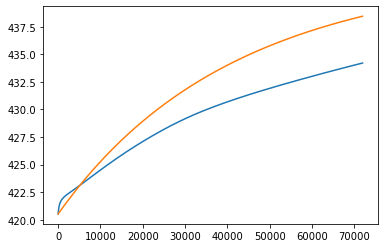

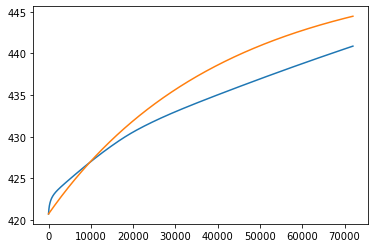

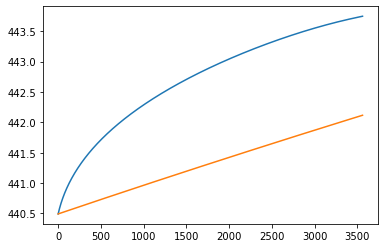

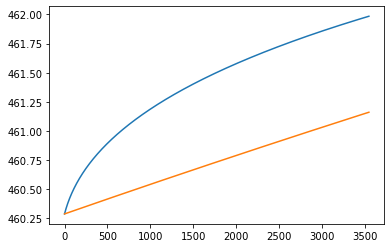

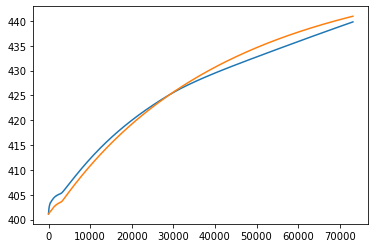

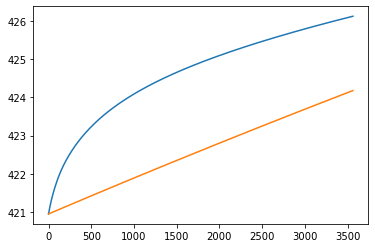

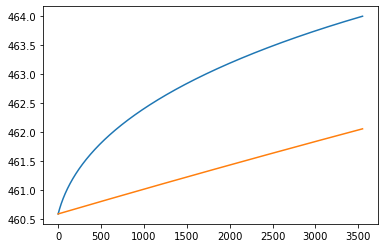

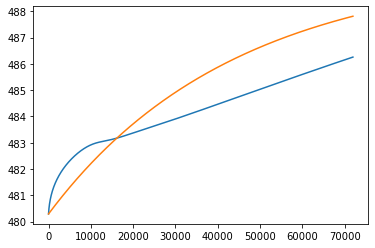

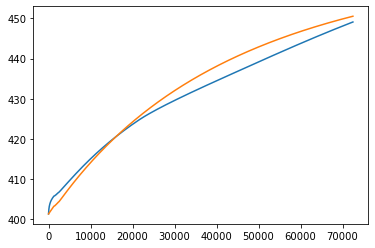

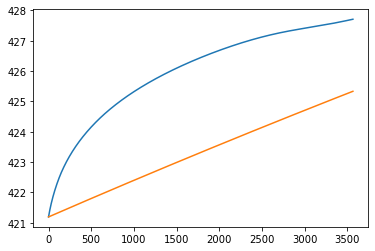

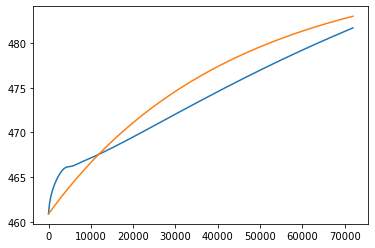

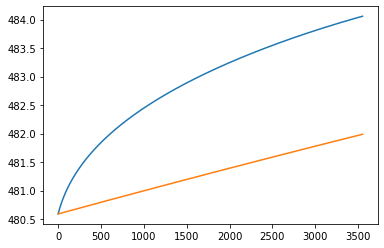

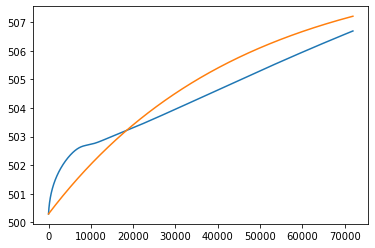

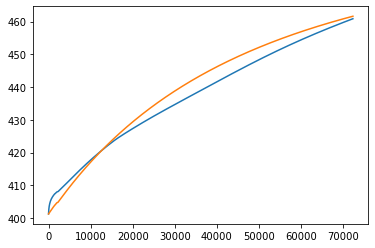

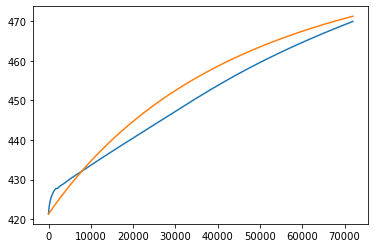

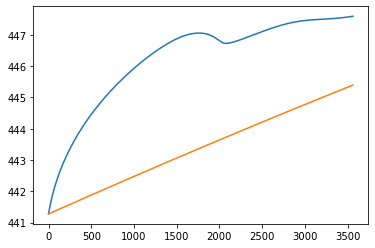

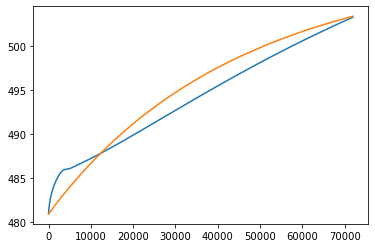

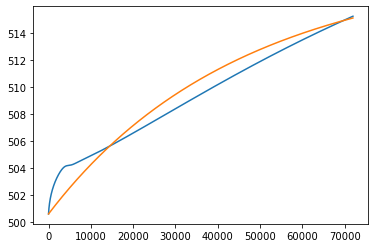

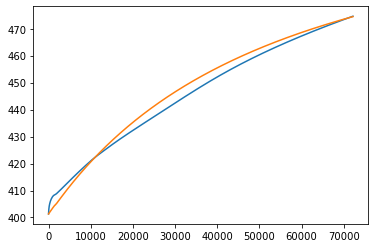

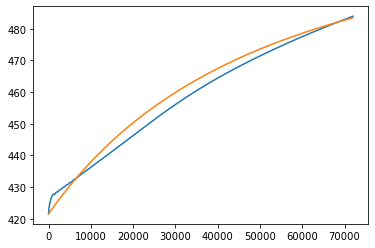

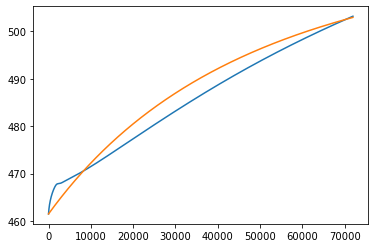

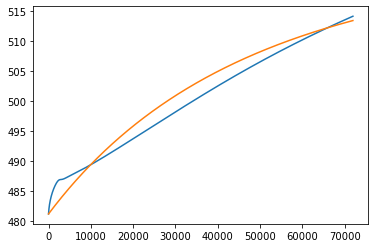

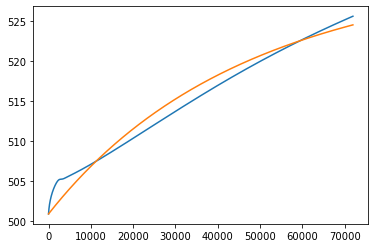

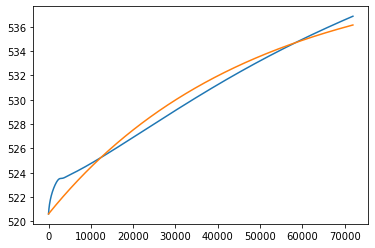

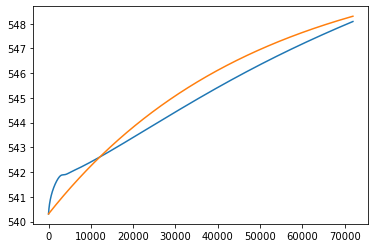

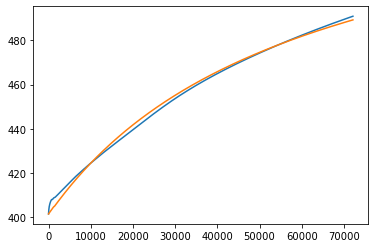

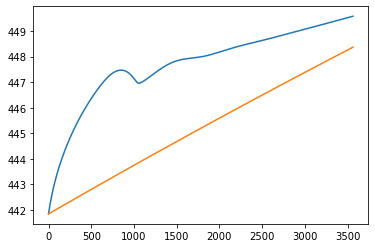

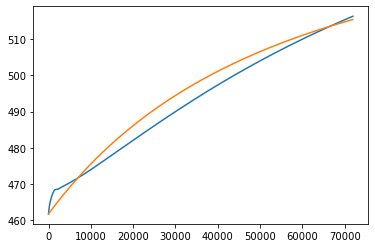

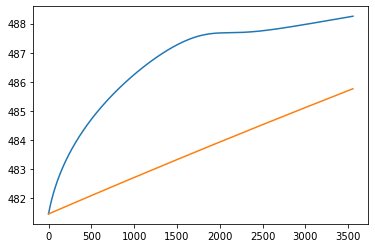

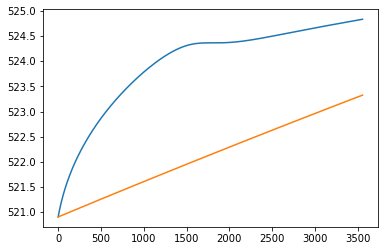

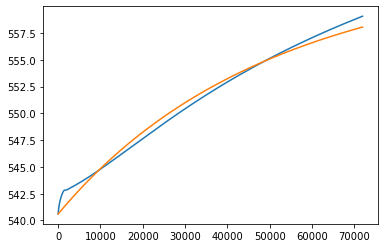

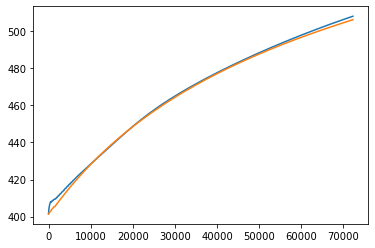

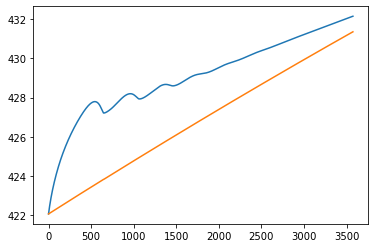

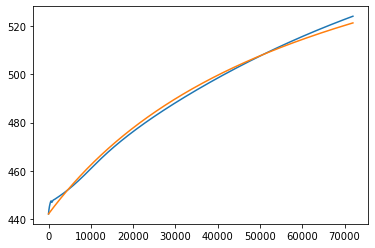

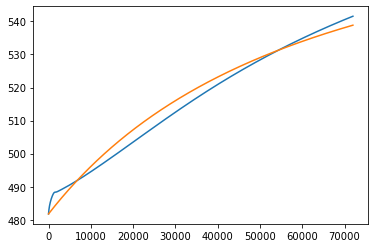

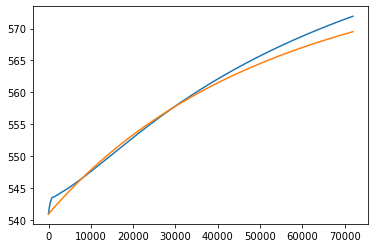

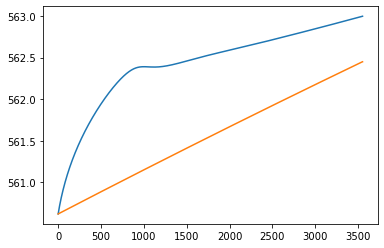

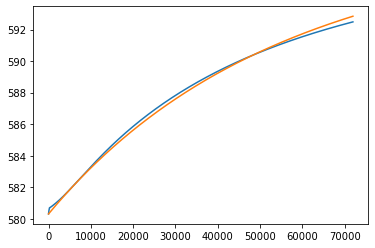

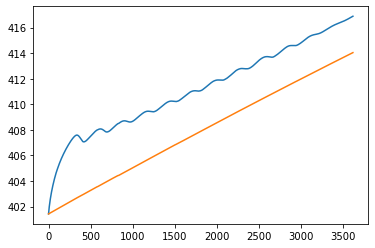

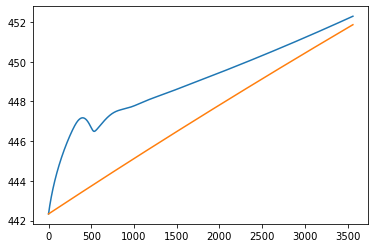

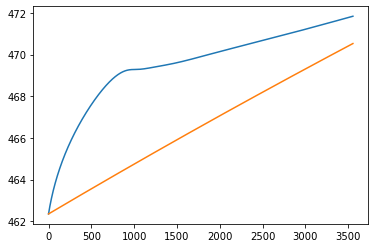

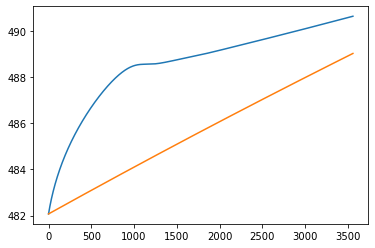

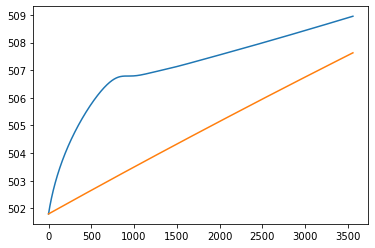

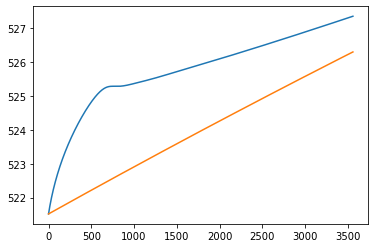

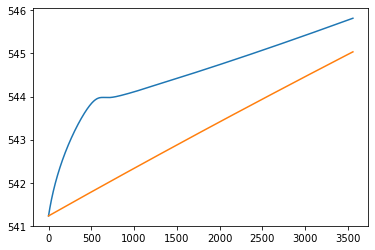

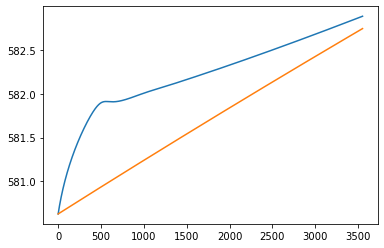

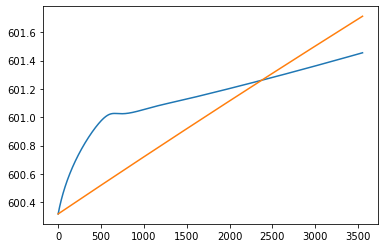

In [226]:
for i in range(50):
    plt.plot(train_data_list[i][:,2])
    plt.plot(res_list[i][:,2])
    plt.show()

In [223]:
rmse_average = rmse_total/50
r2_average = r2_total/50

In [224]:
print(rmse_average)

2.0004986152675532


In [225]:
print(r2_average)

-0.27154557597135276
